In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np 

2023-08-29 21:02:16.882473: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-29 21:02:16.903254: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 21:02:17.055567: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 21:02:17.056704: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 21:02:18.042366: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(X_train , y_train), (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train = X_train /255
X_test = X_test /255

In [4]:
len(X_train)

60000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])
model.compile(
    optimizer= 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics= ['accuracy']
)

model.fit(X_train_flatten, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4709 - accuracy: 0.8774
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3033 - accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2613 - accuracy: 0.9279
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2580 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2556 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2533 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.250

In [8]:
y_pred = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [9]:
y_pred[0]

array([4.73184232e-03, 2.00111092e-08, 1.56992581e-02, 9.72640514e-01,
       1.65267335e-03, 1.90002069e-01, 2.57814676e-08, 9.99814034e-01,
       1.03484616e-01, 7.12922633e-01], dtype=float32)

In [10]:
np.argmax(y_pred[0])

7

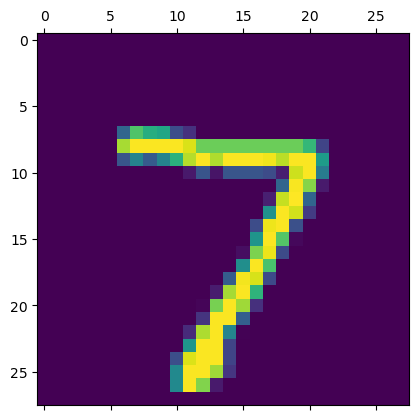

In [11]:
plt.matshow(X_test[0])

In [12]:
y_pred_label = [np.argmax(i) for i in y_pred]

In [13]:
cm = tf.math.confusion_matrix (labels= y_test, predictions=y_pred_label)


In [14]:
import seaborn as sns 

Text(95.72222222222221, 0.5, 'Truth')

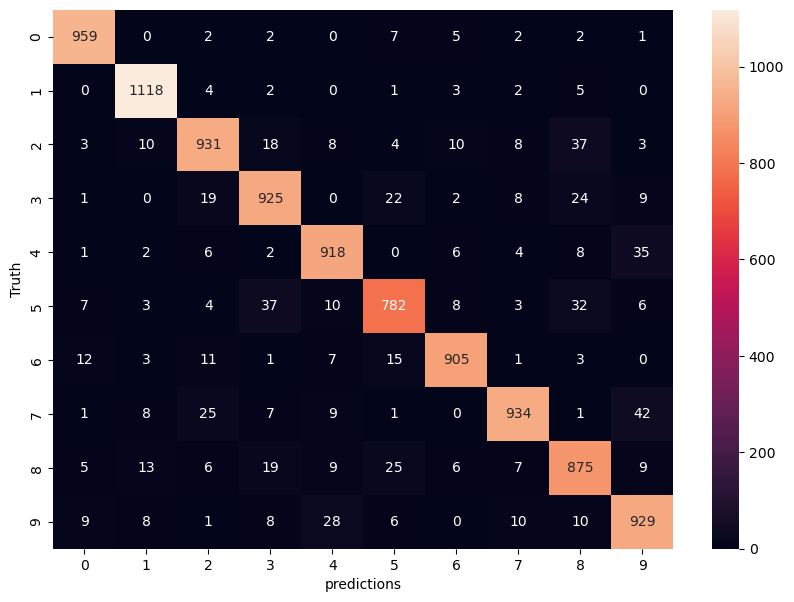

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(cm , annot = True, fmt = 'd')
plt.xlabel ('predictions')
plt.ylabel ('Truth')

In [16]:

model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model1.compile(
    optimizer= 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics= ['accuracy']
)

model1.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2705 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1202 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0839 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0630 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9845


In [17]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.9276


[0.2638399600982666, 0.9276000261306763]

In [18]:
y_pred1 = model1.predict(X_test_flatten)
y_pred_label1 = [np.argmax(i) for i in y_pred1]
cm1 = tf.math.confusion_matrix (labels= y_test, predictions=y_pred_label1)

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

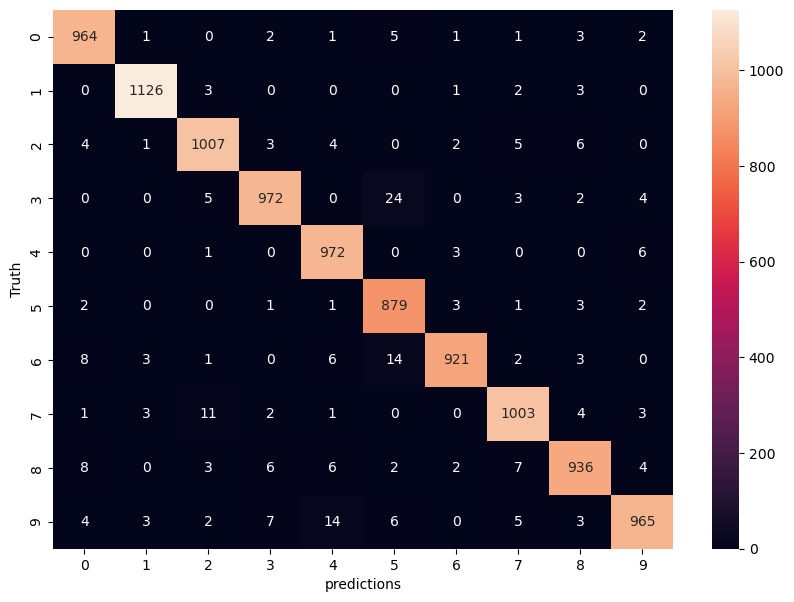

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1 , annot = True, fmt = 'd')
plt.xlabel ('predictions')
plt.ylabel ('Truth')

In [20]:

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model1.compile(
    optimizer= 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics= ['accuracy']
)

model1.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2772 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0868 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0649 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0513 - accuracy: 0.9844


In [21]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0758 - accuracy: 0.9770


[0.0757882297039032, 0.9769999980926514]